## 1. Construct the matrix representing the chain

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def construct_hamiltonian(N:int,t:float,t_prime:float,mu_A=None,mu_B=None,potentials=False)->np.ndarray:
    H  = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i+1 == j and i%1==0 and i>0:
                H[i,j] = t_prime
            if i+1 == j and i%2==0:
                H[i,j] = t
            if i-1 == j and i%1==0 and i>0:
                H[i,j] = t
            if i-1 == j and i%2==0:
                H[i,j] = t_prime

            if potentials:
                if i == j and i%2==0:
                    H[i,j] = mu_A
                if i==j and i%1 ==0 and i>0:
                    H[i,j] = mu_B
    return H

N = 33
t = 1
t_prime = 2
H = construct_hamiltonian(N,t,t_prime)
print(f"for t = {t} and t' = {t_prime} the Hamiltonian is:")


for t = 1 and t' = 2 the Hamiltonian is:


\begin{align}
\hat H =
\begin{bmatrix}
  0. & 1. & 0. & ... & 0. & 0. & 0.\\
  1. & 0. & 2. & ... & 0. & 0. & 0.\\
  0. & 2. & 0. & ... & 0. & 0. & 0.\\
  ...\\
  0. & 0. & 0. & ... & 0. & 1. & 0.\\
  0. & 0. & 0. & ... & 1. & 0. & 2.\\
  0. & 0. & 0. & ... & 0. & 2. & 0.\\
\end{bmatrix}
\end{align}

## 2. Discuss the three cases, a) $t<t'$, b) $t=t'$, c) $t>t'$.
a) For $t<t'$, we get that that on one side of the chain, there is one atom with a very localized electron wave function (it can't hop to its neighbour). We have one edge state.
b) For  $t=t'$, all wave functions are unlocalized as 
c) For  $t>t'$ we get that there is an atom on the other side of the chained (compared with a)) which is very localized as it can't hop to its neighbour. We have one edge state.

## 3. Plot the eigenvalues in ascending order. For which of the cases do you find the zero energy modes?

We find zero energy modes for all the cases.

the approx 0 eigenvalue value is:[-1.56879525e-16]
the approx 0 eigenvalue value is:[9.70890973e-21]
the approx 0 eigenvalue value is:[2.30833607e-14]


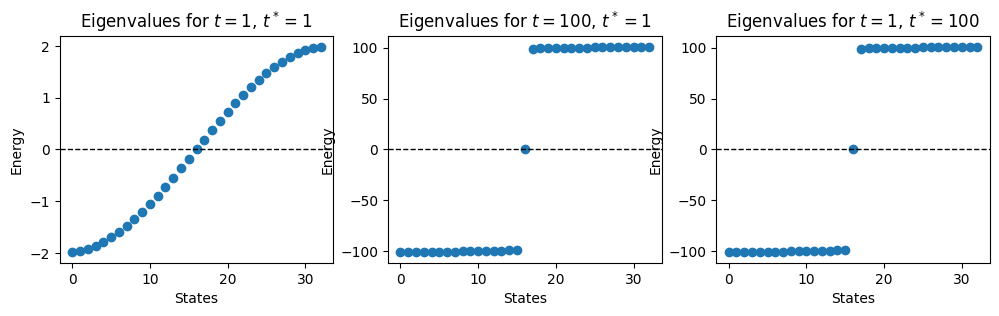

In [22]:
def plot_eigenvals(H:np.ndarray, t:float, t_prime:float,plot_to_subfig=False)->tuple[np.ndarray,np.ndarray]:
    eigenvals,eigenvecs = np.linalg.eig(H)
    if plot_to_subfig:
        plt.subplot(plot_to_subfig[0],plot_to_subfig[0],plot_to_subfig[1])
        plt.title(f'Eigenvalues for $t=${t}, $t^*=${t_prime}')
        plt.plot(sorted(eigenvals), 'o')
        plt.axhline(0, color='black', lw=1, ls='--')
        plt.xlabel('States')
        plt.ylabel('Energy')
        
    else:
        plt.figure(figsize=(6,4))
        plt.title(f'Eigenvalues for $t=${t}, $t^*=${t_prime}')
        plt.plot(sorted(eigenvals), 'o')
        plt.axhline(0, color='black', lw=1, ls='--')
        plt.xlabel('States')
        plt.ylabel('Energy')
        plt.show()
    return eigenvals,eigenvecs

ts = [(1,1),(100,1),(1,100)]
plt.figure(figsize=(12,10))
for i,( t,t_prime) in enumerate(ts):
    H = construct_hamiltonian(N,t,t_prime)
    eigenvals, eigenvecs =  plot_eigenvals(H,t,t_prime,plot_to_subfig=(3,i+1))
    print(f'the approx 0 eigenvalue value is:{eigenvals[np.isclose(eigenvals,0,1e-10)]}')

## 4. If you find zero energy modes for any of the cases, plot the norm of the corresponding eigenvector with respect to the latice sites, and comment on where and to which extent the wave function is localized.

We can see that the wave-function is localized when $t<t'$ and $t>t'$, we can also note that as predicted at exercise 2., the localizations are at the opposite ends. when $t=t'$ the wave-function does not seem to be localized.


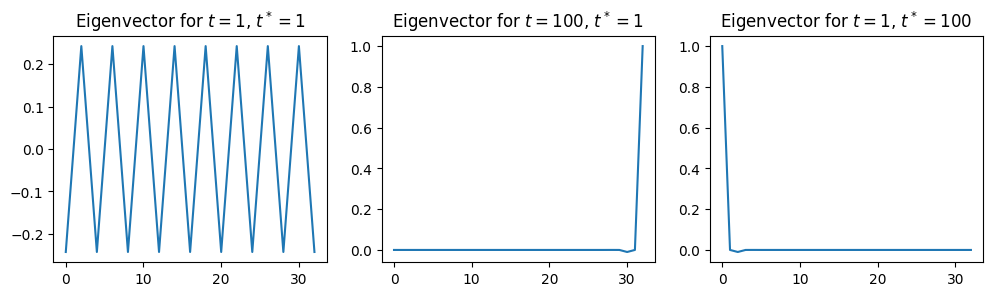

In [23]:
def plot_eigenvec(H:np.ndarray,t:float,t_prime:float,plot_to_subfig = False)-> None:
    eigenvals, eigenvecs =  np.linalg.eig(H)
    zero_value_eigenvec = eigenvecs[:,np.isclose(eigenvals,0,1e-10)]
    if plot_to_subfig:
        plt.subplot(plot_to_subfig[0],plot_to_subfig[0],plot_to_subfig[1])
        plt.title(f'Eigenvector for $t=${t}, $t^*=${t_prime}')
        plt.plot(np.squeeze(zero_value_eigenvec),label=f't={t},t_prime={t_prime}')
    else:
        plt.figure(figsize=(6,4))
        plt.title(f'Eigenvector for $t=${t}, $t^*=${t_prime}')
        plt.plot(np.squeeze(zero_value_eigenvec),label=f't={t},t_prime={t_prime}')
        plt.show()

plt.figure(figsize=(12,10))
for i,(t,t_prime) in enumerate(ts):
    H = construct_hamiltonian(N,t,t_prime)
    plot_eigenvec(H,t,t_prime,plot_to_subfig=(3,i+1))


